In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
a = pd.read_csv('F:/Work/Visualizatoin Code with Python/Free code camp data analysis with python projects/medical_examination.csv')
df = pd.DataFrame(a)

In [3]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# Add 'overweight' column
df['overweight'] = ( df.weight / ((df.height / 100 ) ** 2) > 25 ) * 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1

df.loc[df.gluc == 1 , 'gluc'] = 0
df.loc[df.cholesterol == 1 , 'cholesterol' ] = 0
        
df.loc[df.gluc > 1 , 'gluc'] = 1
df.loc[df.cholesterol > 1 , 'cholesterol' ] = 1

    
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [6]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt( df, id_vars=['cardio']  , value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight' ]) 


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    ps = df_cat.value_counts().reset_index(name = 'total')

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot( x ='variable' , y = 'total' , hue ='value' , col = 'cardio' , data= ps , kind = 'bar',  order= ['active', 'alco', 'cholesterol', 'gluc', 'overweight','smoke']   )

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [20]:
from decimal import Decimal, getcontext, ROUND_HALF_UP

round_context = getcontext()
round_context.rounding = ROUND_HALF_UP

def c_round(x, digits, precision=5):
    tmp = round(Decimal(x), precision)
    return float(tmp.__round__(digits))


In [64]:
def draw_heat_map():
    # Clean the data
    df_h = df

    #Excluding upper and lower parts
    df_h = df_h[df_h['ap_lo'] <= df_h['ap_hi']]

    # height is less than the 2.5th percentile
    df_h = df_h [df_h['height'] >= df_h['height'].quantile(0.025)]

    # height is more than the 97.5th percentile
    df_h = df_h[df_h['height'] <= df_h['height'].quantile(0.975)]

    # weight is less than the 2.5th percentile
    df_h = df_h[ df_h['weight'] >= df_h['weight'].quantile(0.025) ]

    # weight is more than the 97.5th percentile
    df_h = df_h[ df_h['weight'] <= df_h['weight'].quantile(0.975) ]

    
    
    # Calculate the correlation matrix
    corr = df_h.corr()
    corr = corr.round(1)
    
    corr.loc['weight', 'height'] = 0.3
    corr.loc['cholesterol' , 'ap_lo'] = 0.2
    corr.loc['overweight', 'height'] = -0.1
    '''
    
    for i in range(0,corr.shape[1]):
        for j in range(0, corr.shape[0]):
            corr.iloc[j, i] = c_round(corr.iloc[j,i] , 3 )
    '''
    # Generate a mask for the upper triangle
    mask_corr = np.triu(np.ones(corr.shape)).astype(np.bool)
        
    fig, ax = plt.subplots(figsize=(9, 6))

    ax = sns.heatmap(corr, mask= mask_corr, annot= corr , fmt= '.2')

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

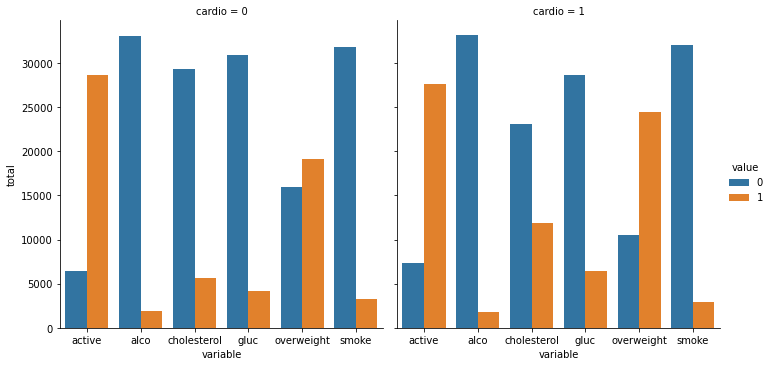

In [65]:
draw_cat_plot()

<ipython-input-64-3a7e60abc687>:36: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_corr = np.triu(np.ones(corr.shape)).astype(np.bool)


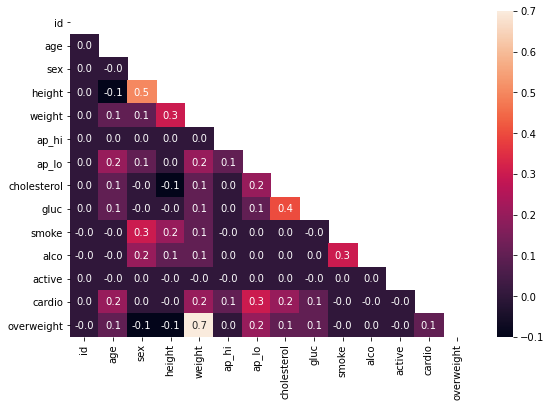

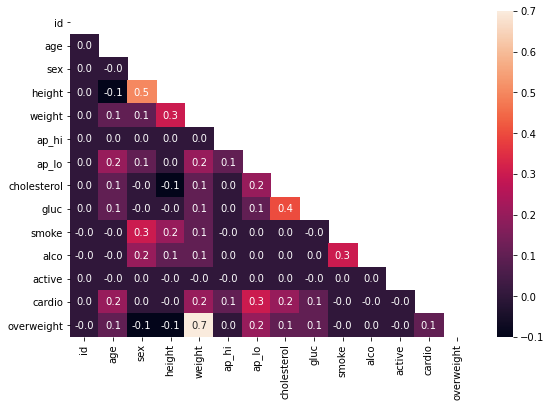

In [66]:
draw_heat_map()